# SNA Project – Group B Feedback Report

## 0) Importing libraries

In [1]:
import random #random generator
import networkx as nx #this is for network
import matplotlib.pyplot as plt #this is for drawing
import numpy as np #this is for matrices
import csv #this is to read csv files
import time # this is to get computational time
import pandas as pd # this is for dataframes
import math # some math tools for week 5

## 0.1) General introduction

Social Network Analysis 2022/2023 Group Project.

Group B: Davide Beltrame, Giulia Bruno, Demetrio Francesco Cardile, Mariasole Mohn.

The graph we chose is the "Jazz collaboration network" graph. It is an undirected, unweighted and connected network of relatively small size (as it has only 198 nodes), and, as the name suggests, it encompasses the network of collaborations among jazz musicians and bands performing between 1912 and 1920.

It was extracted from The Red Hot Jazz Archive digital database, covering bands that performed between 1912 and 1940.
Nodes are jazz musicians, while links represent collaboration.

Source: P. Gleiser and L. Danon, "Community Structure in Jazz." Advances in Complex Systems 6(4), 565-573 (2003).

# 1) WEEK 1

In Week 1, we have chosen the Jazz graph. We are going to:

a) Implement it in Python.

b) Draw a subgraph of the graph and explain how we chose it.

c) Compute the number of nodes, edges, average degree and the density and comment about this.

## 1.1) Reading the input file

In this cell we aim at creating a list of lists, each containing two nodes: source node and target node. 

We start reading over the input file, and exploit the "readlines" method which returns a list containing each line of the file as a list item. 

Secondly, we delete the first three lines of the file, which are just titles ('Vertices     198\n', 'Arcs\n', 'Edges\n') which describe the values we find in the graph representation.

Since our graph is an unweighted one, we ignore the last item of the line of the file, being the latter always "1".

Finally, after iterating over "lines", we create "data_final": a list of lists, each containing only the source node and the target node.

In [2]:
with open("jazz.net") as f:
    lines=f.readlines()
    data_final=[]
    for i in range(3): # this small loop deletes the "description" values
        lines.remove(lines[0])
        i += 1
    for line in lines:
        data = line.split()
        data_final.append(data[0:2])

l_nodes = []

for lst in data_final:
    for node in lst:
        if int(node) not in l_nodes:
            l_nodes.append(int(node))

## 1.2) Implementing the graph

In this section we implement the graph starting from a list of edges. 

To create the list of edges we initialize a variable "list_of_edges" as a first step. 

We then iterate over "data_final" and append to the list of edges a tuple containing two integers, respectively the two nodes representing an edge. Once we have implemented the list of edges, it's just a matter of exploiting networkx to create and draw the graph.

We are going to notice that the graph is too big and dense to be plotted graphically. Luckily, we are going to see an interpretable subgraph.


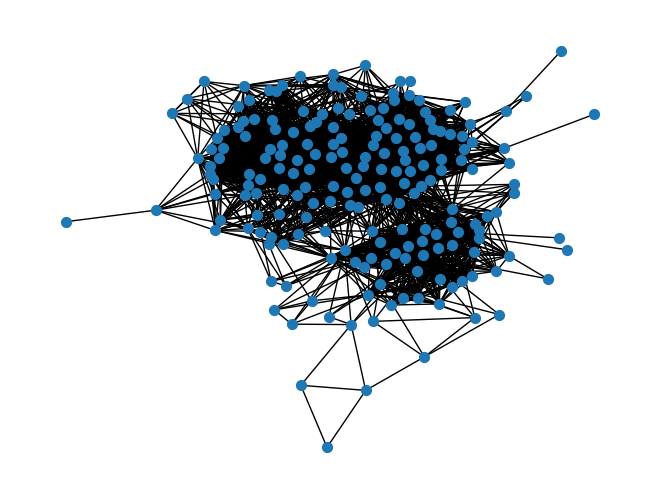

In [3]:
list_of_edges = []

#creating list of edges
for lst in data_final:
    list_of_edges.append((int(lst[0]), int(lst[1])))

G = nx.Graph()
G.add_nodes_from(sorted(l_nodes))
G.add_edges_from(list_of_edges) 

nx.draw_kamada_kawai(G, node_size=50)

## 1.3) Creating the subgraph

In order to create the subgraph, we will only consider edges between nodes that are divisible by 5. Unfortunately, we have no information concerning each node, hence this generic approach was a better alternative to a random one, in which the subgraph would always change and would never stay fixed (thus not allowing meaningful computations on metrics, since always changing).

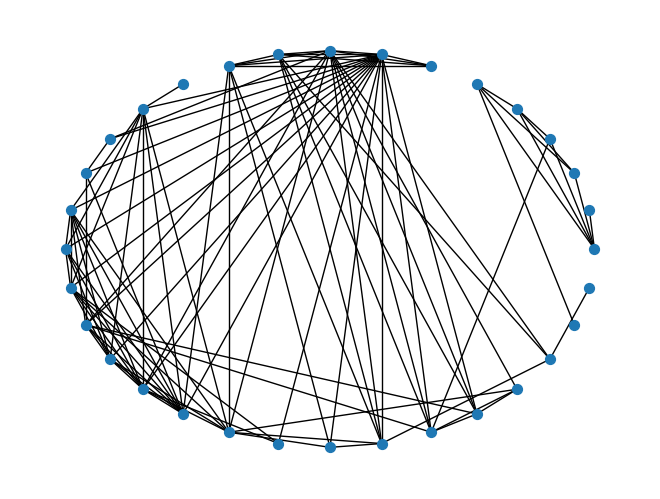

In [4]:
edges_of_subgraph = []
for i in list_of_edges:
    if i[0]%5 == 0 and i[1]%5== 0:
        edges_of_subgraph.append(i)
        
subgraph = nx.from_edgelist(edges_of_subgraph) #creating the subgraph
nx.draw_circular(subgraph,with_labels=False, node_size = 50) #drawing the subgraph

We will compute some useful measures on the subgraph, even if not required, for the sake of completeness.

In [5]:
#number of nodes of the subgraph
nodes_subgraph = subgraph.number_of_nodes()
print("number of nodes:",nodes_subgraph)

#number of edges of the subgraph
edges_subgraph = subgraph.number_of_edges()
print("number of edges:",edges_subgraph)

#average degree of the subgraph
average_degree_subgraph = 2*(edges_subgraph)/nodes_subgraph
print("average degree:",average_degree_subgraph)

#density of the subgraph
density_subgraph = average_degree_subgraph/(nodes_subgraph - 1)
print("density:",density_subgraph)

#verifying whether the subgraph is connected or not
connectivity = nx.is_connected(subgraph)
print("The subgraph is connected:",connectivity)

#searching for the greatest connected component
if connectivity == False:
    largest_connected_component = max(nx.connected_components(subgraph), key=len)
    print(len(largest_connected_component))

number of nodes: 32
number of edges: 100
average degree: 6.25
density: 0.20161290322580644
The subgraph is connected: True


## 1.4) Number of nodes, edges, average degree and density

In [6]:
#number of nodes
number_of_nodes = G.number_of_nodes()
print("number of nodes:",number_of_nodes)

#number of edges
number_of_edges = G.number_of_edges()
print("number of edges:",number_of_edges)

#average degree
'''
Recall that in an undirected graph <k> = 2L/N
'''
average_degree = 2*(number_of_edges)/number_of_nodes
print("average degree:",average_degree)

#density
'''
Recall that in an undirected graph d = <k>/(N-1)
'''
density = average_degree/(number_of_nodes - 1)
print("density:",density)

number of nodes: 198
number of edges: 2742
average degree: 27.696969696969695
density: 0.14059375480695277


Here we undestood some features of our graph.

As stated in the beginning, our graph has below 200 nodes but almost 3000 nodes: this means that the average degree is around 28. We expect this as there are some famous jazz musicians who collaborated with tens of colleagues.

The density, nevertheless, is quite low: 0.14.

# 2) WEEK 2

In this week, we gain some more insights on our Jazz graph.  We take the largest component and we choose to do the following:

a) Computing the Average distance and Diameter,

b) Improving the function computing the inverse distance function.

## 2.1) Average degree, distance and diameter

As a first step, we will verify whether the graph G is connected or not.

In [7]:
nx.is_connected(G)

True

Since the output is "True", the graph consists of one single component. We will compute the next metrics on such component.

In [8]:
#AVERAGE DEGREE

#creating a list containing all the nodes of the graph
list_nodes = G.nodes
list_of_nodes = []
for node in list_nodes:
    list_of_nodes.append(node)

#computing the average degree
average_degree = 0

for node in list_of_nodes:
    average_degree += G.degree(node)/number_of_nodes
    
print(average_degree)

27.696969696969685


We will now focus on the average distance. The average distance in a graph is defined as the average length of a shortest path between two vertices, taken over all pairs of vertices.


In [9]:
#AVERAGE DISTANCE
average_distance = nx.average_shortest_path_length(G)
print(average_distance)

2.2350407629595446


This result shows us that, on average, the shortest path between two nodes of the graph has length approximately equal to 2. We will compare such indicator to the diameter of the graph, representing the longest shortest path of the graph.

In [10]:
diameter = nx.diameter(G)
print(diameter)

6


## 2.2) Improving the function computing the inverse distance

In order to keep track of all the inverse distances, we will build the distance table from scratch. 

Our graph consists of 198 nodes, hence the matrix representing the distance table will be a 198x198 one. The idea is to initialize such matrix with all zeros, then add all the length of the shortest pahts whenever the index i (row index) is different from the index j (column index).

### Initializing the matrix

In [11]:
matrix_distances = np.zeros((number_of_nodes, number_of_nodes))

#to visualize the matrix:
#print(matrix_inv_distances)

### Inserting the length of shortest paths

In [12]:
for i in range(1,number_of_nodes+1):
    for j in range (1,number_of_nodes+1):
        matrix_distances[i-1][j-1]=nx.shortest_path_length(G,i,j)

NOTE:
We're adding '+1' to the end element in the range in order to reach node 198
(otherwhise it would stop at node 197). 
We then add '-1' to both 'i' and 'j' in order to initialize the matrix starting 
from position [0][0], otherwise it would be initialized starting from [1][1]
(since i and j start from 1 in the range).

In [13]:
'''
To double check, we pick any row of the matrix and compare the 'i to j' distance
you see in such row with the one given by the proper nx function.
'''
print(matrix_distances[0])
print(nx.shortest_path_length(G,1,21))

[0. 3. 3. 3. 3. 5. 2. 1. 2. 2. 3. 2. 3. 2. 2. 2. 3. 2. 2. 2. 4. 2. 2. 1.
 3. 3. 3. 3. 3. 4. 2. 2. 2. 3. 1. 2. 3. 3. 3. 2. 3. 1. 2. 2. 3. 1. 4. 2.
 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 3. 3. 3. 1. 3. 2. 1. 2. 2. 2. 3. 3. 2. 2. 2. 3. 2. 3. 2. 2. 1. 3.
 3. 1. 1. 1. 1. 4. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 3. 2. 3. 2. 2. 2. 3. 4.
 2. 2. 2. 3. 2. 3. 2. 3. 2. 2. 1. 1. 4. 2. 2. 2. 2. 3. 2. 3. 2. 2. 2. 3.
 4. 2. 3. 3. 3. 2. 2. 4. 2. 1. 3. 3. 4. 2. 1. 4. 2. 3. 3. 2. 4. 2. 3. 1.
 4. 2. 1. 3. 4. 2. 3. 3. 3. 2. 2. 4. 3. 2. 2. 3. 3. 3. 2. 2. 3. 2. 3. 2.
 2. 2. 2. 2. 2. 3.]
4


### Average inverse distance

To compute the average inverse efficiency, we use two methods.

The first one is given by networkx, with average global efficiency.
Efficiency is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes.

The second one is a measure given by our function, which considers unconnected nodes as having distance 1.

In [14]:
#function computing inverses
dist = ""
def inverse_distance(G, i, j):
    
    distance = matrix_distances[i-1][j-1]
    if int(distance) != 0:
        inverse_distance = 1/distance
        dist = ""
    else:
        inverse_distance = 1
        dist = "(inf)"
    return inverse_distance

# average inverse distance

av_inv_dist = nx.global_efficiency(G) # first aforementioned method

print(av_inv_dist)

x = 0
av_inv_dist2 = 0
for i in range(199): # second method
    for j in range(199):
        av_inv_dist2 += inverse_distance(G,i,j)
        x += 1
        

print(av_inv_dist2/x)

0.5131971149737683
0.5149095561559887


In [15]:
# same function, without infinity prevention
def inverse_distance(G, i, j): 
    distance = matrix_distances[i-1][j-1] 
    inverse_distance = 1/distance
    return inverse_distance

#some useful double checks
print("Distance from 1 to 21: ", nx.shortest_path_length(G,1,21))
print("Inverse distance from 1 to 21: ", inverse_distance(G, 1, 21), dist, '\n')
print("Distance from 1 to 1: ", nx.shortest_path_length(G,1,1))
print("Inverse distance from 1 to 1: ", inverse_distance(G, 1, 1), dist, '\n')
print("Distance from 1 to 6: ", nx.shortest_path_length(G,1,6))
print("Inverse distance from 1 to 6: ", inverse_distance(G, 1, 6), dist, '\n')

Distance from 1 to 21:  4
Inverse distance from 1 to 21:  0.25  

Distance from 1 to 1:  0
Inverse distance from 1 to 1:  inf  

Distance from 1 to 6:  5
Inverse distance from 1 to 6:  0.2  



/var/folders/jt/lhtzzpdd2vs1b862wm2r6ynm0000gn/T/ipykernel_5411/281716844.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  inverse_distance = 1/distance


# 3) WEEK 3

In this week, we provide code computing decay centrality using basic functions of networkx.

We chose it as we believe that direct collaboration in jazz music has to be strictly 

We are going to discuss why we picked this measure and which is the most central node in our network based on decay centrality.
     
Furthermore, we will provide the cumulative distribution for this centrality and give a graphical representation of our graph.

## 3.1) Computing the decay centrality

We assume the parameter to be equal to 1/2. Hence, we will proceed iterating over each row of the matrix of distances. At each iteration, we will compute the sum (parameter = 1/2)^distance for each element of the row.

In [16]:
data_decay_centrality = []
for row in matrix_distances:
    node_dec_centrality = 0
    for distance in row:
        node_dec_centrality += (1/2)**distance
    data_decay_centrality.append(node_dec_centrality)

In [17]:
#to make a check
print(data_decay_centrality, '\n')
print(len(data_decay_centrality))

[46.03125, 32.796875, 34.375, 39.9375, 57.0625, 11.0, 60.34375, 49.21875, 49.4375, 49.53125, 49.84375, 48.96875, 43.9375, 51.15625, 35.453125, 35.828125, 40.15625, 56.9375, 52.34375, 48.15625, 29.28125, 49.53125, 46.40625, 52.65625, 36.0625, 48.875, 40.1875, 45.6875, 51.5625, 19.546875, 47.71875, 54.78125, 50.15625, 37.59375, 52.28125, 49.96875, 34.6875, 44.59375, 38.3125, 50.15625, 42.4375, 45.90625, 52.96875, 50.53125, 42.4375, 46.28125, 30.40625, 35.453125, 57.96875, 50.71875, 47.9375, 43.40625, 58.09375, 58.46875, 49.34375, 52.34375, 56.21875, 49.28125, 46.59375, 70.09375, 51.78125, 48.78125, 49.03125, 49.40625, 53.28125, 53.53125, 54.65625, 44.40625, 60.21875, 63.375, 53.6875, 42.15625, 55.25, 45.40625, 46.34375, 46.6875, 50.09375, 52.15625, 48.5625, 48.78125, 55.78125, 43.09375, 63.03125, 48.46875, 41.25, 55.625, 48.28125, 56.5, 50.84375, 53.625, 46.90625, 32.78125, 51.40625, 51.15625, 55.96875, 58.25, 46.84375, 57.40625, 61.40625, 58.15625, 58.15625, 39.0, 47.53125, 43.46875, 57

## 3.2) Most central node

In [18]:
max_value = max(data_decay_centrality) 
max_index = data_decay_centrality.index(max_value) 
print(max_index, '\n')

node_max1 = list_of_nodes[max_index] #needs to be fixed
print(list_of_nodes, '\n')

print(node_max1)

135 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198] 

136


## 3.3) Cumulative distribution 

In [19]:
print(sorted(data_decay_centrality))

[11.0, 18.359375, 19.1875, 19.546875, 20.0, 23.359375, 25.46875, 29.28125, 29.84375, 30.40625, 30.75, 32.03125, 32.125, 32.78125, 32.796875, 34.375, 34.6875, 35.21875, 35.375, 35.453125, 35.453125, 35.828125, 36.0625, 37.59375, 38.3125, 38.3125, 39.0, 39.1875, 39.9375, 40.15625, 40.1875, 40.1875, 41.25, 41.46875, 42.0, 42.078125, 42.15625, 42.4375, 42.4375, 42.5, 42.75, 43.09375, 43.40625, 43.46875, 43.53125, 43.9375, 44.1875, 44.40625, 44.40625, 44.4375, 44.59375, 45.21875, 45.40625, 45.46875, 45.53125, 45.6875, 45.90625, 45.9375, 46.03125, 46.28125, 46.34375, 46.40625, 46.59375, 46.6875, 46.78125, 46.8125, 46.84375, 46.90625, 46.9375, 46.9375, 47.09375, 47.3125, 47.53125, 47.71875, 47.9375, 48.15625, 48.21875, 48.28125, 48.34375, 48.46875, 48.5625, 48.59375, 48.78125, 48.78125, 48.78125, 48.8125, 48.875, 48.96875, 49.03125, 49.21875, 49.28125, 49.34375, 49.40625, 49.4375, 49.53125, 49.53125, 49.78125, 49.84375, 49.96875, 50.09375, 50.09375, 50.09375, 50.15625, 50.15625, 50.21875, 50.

As a first step, we create a dictionary of relative frequencies, meaning that each key of the dictionary will represent the decay centrality, and the corresponding value is how many times such value of decay centrality appeared. For the sake of completeness, we first the list containing the decay centralities.

In [20]:
centralities_sorted = sorted(data_decay_centrality)
counter = {} #a
for value in centralities_sorted:
  if value not in counter:
    counter[value] = 1
  else: #meaning that there is already 
    counter[value] += 1
    
print(counter, '\n')
print(len(counter.keys()))

{11.0: 1, 18.359375: 1, 19.1875: 1, 19.546875: 1, 20.0: 1, 23.359375: 1, 25.46875: 1, 29.28125: 1, 29.84375: 1, 30.40625: 1, 30.75: 1, 32.03125: 1, 32.125: 1, 32.78125: 1, 32.796875: 1, 34.375: 1, 34.6875: 1, 35.21875: 1, 35.375: 1, 35.453125: 2, 35.828125: 1, 36.0625: 1, 37.59375: 1, 38.3125: 2, 39.0: 1, 39.1875: 1, 39.9375: 1, 40.15625: 1, 40.1875: 2, 41.25: 1, 41.46875: 1, 42.0: 1, 42.078125: 1, 42.15625: 1, 42.4375: 2, 42.5: 1, 42.75: 1, 43.09375: 1, 43.40625: 1, 43.46875: 1, 43.53125: 1, 43.9375: 1, 44.1875: 1, 44.40625: 2, 44.4375: 1, 44.59375: 1, 45.21875: 1, 45.40625: 1, 45.46875: 1, 45.53125: 1, 45.6875: 1, 45.90625: 1, 45.9375: 1, 46.03125: 1, 46.28125: 1, 46.34375: 1, 46.40625: 1, 46.59375: 1, 46.6875: 1, 46.78125: 1, 46.8125: 1, 46.84375: 1, 46.90625: 1, 46.9375: 2, 47.09375: 1, 47.3125: 1, 47.53125: 1, 47.71875: 1, 47.9375: 1, 48.15625: 1, 48.21875: 1, 48.28125: 1, 48.34375: 1, 48.46875: 1, 48.5625: 1, 48.59375: 1, 48.78125: 3, 48.8125: 1, 48.875: 1, 48.96875: 1, 49.03125:

In [21]:
cdf = 0
for i in counter:
    cdf += counter[i]/number_of_nodes

cdf_x = [] 
cdf_y = [] 
data_decay_centrality_copy = data_decay_centrality.copy() 
N = len(data_decay_centrality_copy)
N_temp = N 
while data_decay_centrality_copy:
    current_min = min(data_decay_centrality_copy) 
    current_num = data_decay_centrality_copy.count(current_min) 
    cdf_x.append(current_min) 
    cdf_y.append(N_temp/198) 
    N_temp = N_temp-current_num 
    for n in range(current_num):
        data_decay_centrality_copy.remove(current_min)

print(len(cdf_x))
print(len(cdf_y))

172
172


### Plotting the cumulative distribution

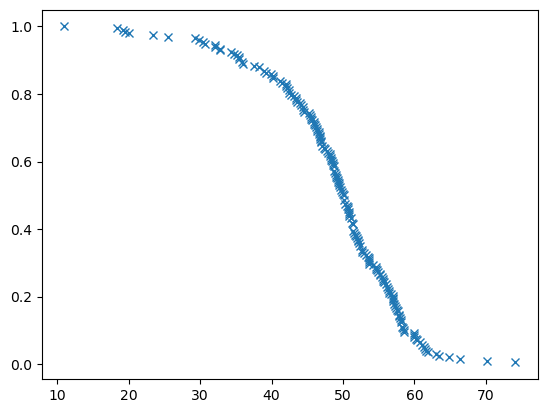

In [22]:
plt.plot(cdf_x,cdf_y,"x")

We notice that the centrality decreases in quite a smooth manner:
at the beginning, we have a small number of nodes with a high centrality; then, there is a rapid descent towards a small group of nodes that are not central at all. We will start to see in Week 6 what this determines.

# 4) WEEK 5

In Week 5 we are going to:

1) Write a function to compute the PageRank of the nodes in a graph (without the use of built-in functions from NetworkX).

2) Run it on our graph using α = 0.15, save the total number of iterations, and check that our function returns the same results (in terms of the scores) as the built-in function from NetworkX.

3) Identify the node with the highest PageRank, compare it with the one we got from week 3, and give an interpretation to the possible difference.

4) Provide the cumulative distribution, compare it with the one we got from week 3, and comment the results. 

5) Re-run the PageRank using α = 0.5, save the total number of iterations, compare with the results (in terms of both the number of iterations and the cumulative distribution) obtained for α = 0.15, and comment.

## 4.0) Importing new package

In [23]:
import scipy as sp    # scientific computations (slower than numpy, but with broader functionalities)

## 4.1) PageRank function

We create a dictionary in which the keys are all the nodes, and the values are their neighbors. Then, we sort it by their keys.

In [24]:
neighbors = {}

for i in list_of_edges:
    
    if i[0] not in neighbors.keys():
        neighbors[i[0]] = []
    else:
        neighbors[i[0]].append(i[1])
        
    if i[1] not in neighbors.keys():  #double directed graph
        neighbors[i[1]] = []
    else:
        neighbors[i[1]].append(i[0]) 
     
sorted_keys = sorted(neighbors.keys())
neighbors = {key:neighbors[key] for key in sorted_keys}

We initialise a dictionary mypr where the initial pagerank of every node is 1/N.

In [25]:
mypr = {}
k_out = {}
N = number_of_nodes
    
for i in neighbors:
    mypr[i]=1/N 
    k_out[i]=len(neighbors[i])

## 4.2) Mypr with $\alpha$ = 0.15

In [26]:
# NEW APPROACH

iterations = 0  
a = 0.15
while True:
    diff = 0
    mypr2 = mypr.copy() # we create a clone of mypr in order to distinguish two contiguous iterations
    for i in mypr2:
        sum = 0
        for j in neighbors[i]:
            sum += mypr2[j]/k_out[j]        
        mypr2[i]= a/N + (1-a)*sum
    print(mypr2[1])    
    iterations += 1 # iteration counter

    for i in mypr2:
        diff = abs(mypr[i] - mypr2[i]) # we check if *all* the values are the same
        if diff < 10**-6: # in order to check the convergence between two iterations
            a = 1 
        
    if a == 1:
        break
    
    mypr = mypr2
    
print("Number of iterations:",iterations)

0.003992967502370635
0.003745483956212123
0.0038603792873715113
Number of iterations: 3


### Built-in function

In [27]:
# PageRank scores computation
pr = nx.pagerank(G)   # returns a dictionary

# Separately save the values of the dictionary
pr_values = pr.values()

## 4.3) Node with highest PageRank

In [28]:
mypr_values = mypr.values()
# Node with highest value of PageRank
value_max = max(mypr_values)
index_max = list(mypr_values).index(value_max) 
node_max = list_of_nodes[index_max] 
print('The winner for our PageRank is: ' + str(node_max) + '!')
print('And the winner for decay centrality was: ' + str(node_max1) + '!')

The winner for our PageRank is: 136!
And the winner for decay centrality was: 136!


We are lucky: they are the same!

### Comparison with built-in function

In [29]:
# Node with highest value of PageRank
value_max = max(pr_values)
index_max = list(pr_values).index(value_max) 
node_max = list_of_nodes[index_max] 
print('And the winner for built-in PR is: ' + str(node_max) + '!')

And the winner for built-in PR is: 136!


## 4.4) Cumulative distribution

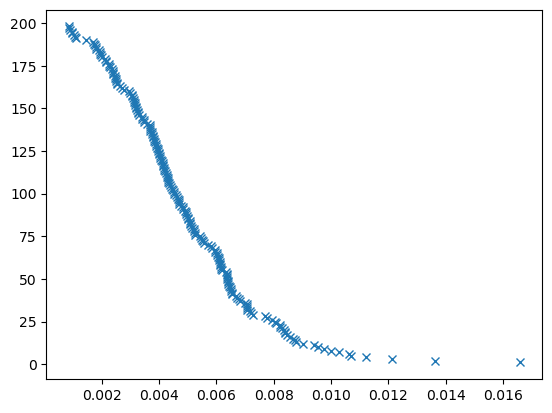

In [30]:
# Cumulative distribution for our PageRank function

cdf_x = []  # list of x-axis
cdf_y = []  # list of y-axis

mypr_values_copy = list(mypr_values).copy() 
N = len(mypr_values_copy)
N_temp = N 

while mypr_values_copy:
    current_min = min(mypr_values_copy) 
    current_num = mypr_values_copy.count(current_min) 
    cdf_x.append(current_min) 
    cdf_y.append(N_temp)
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        mypr_values_copy.remove(current_min) 
        
plt.plot(cdf_x,cdf_y,"x")

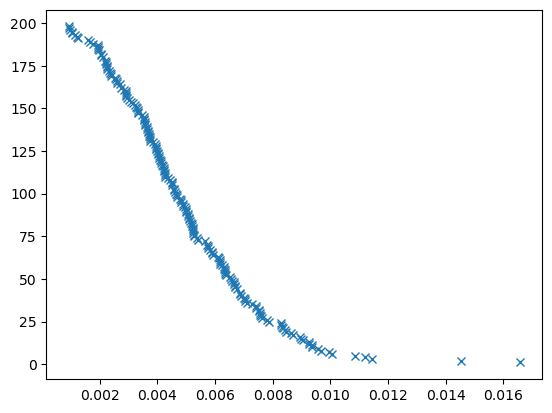

In [31]:
# Cumulative distribution for built-in PageRank

cdf_x = []  # list of x-axis
cdf_y = []  # list of y-axis

pr_values_copy = list(pr_values).copy() 
N = len(pr_values_copy)
N_temp = N 

while pr_values_copy:
    current_min = min(pr_values_copy) 
    current_num = pr_values_copy.count(current_min) 
    cdf_x.append(current_min) 
    cdf_y.append(N_temp)
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        pr_values_copy.remove(current_min) 
        
plt.plot(cdf_x,cdf_y,"x")

### Comparison between them and with decay centrality

As we remember from the comments on decay centrality, we had some differences in the tail distribution:
- in both our PR distributions, which appear to have the same shape despite having some small changes in value, the least central nodes appear farther away from the rest, in terms of centrality. 
- PR shows that centrality among nodes decreases in a more gradual manner.

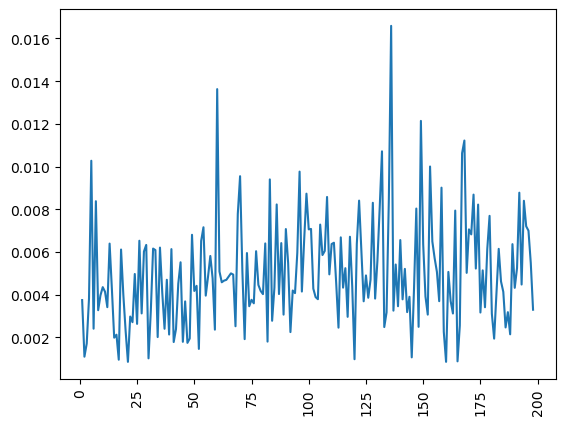

In [32]:
# Plot the PageRank scores (our function)
plt.xticks(rotation = 90)
plt.plot(list_of_nodes, mypr.values())

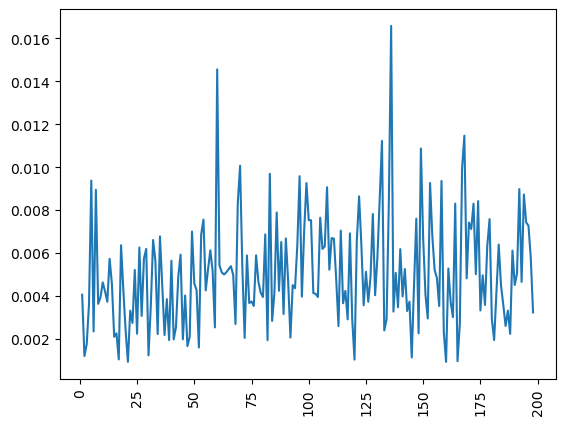

In [33]:
# Plot the PageRank scores (built-in)
plt.xticks(rotation = 90)
plt.plot(list_of_nodes, pr.values())

With the last two plots we notice the congruity of the two pagerank methods, even though there is a slight constant shifting factor that we notice in the left axis.

## 4.2) Mypr with $\alpha$ = 0.5 (optional)

In [34]:
iterations = 0  
a = 0.5
while True:
    diff = 0
    mypr2 = mypr.copy() 
    for i in mypr2:
        sum = 0
        for j in neighbors[i]:
            sum += mypr2[j]/k_out[j]        
        mypr2[i]= a/N + (1-a)*sum
    
    iterations += 1 # iteration counter

    for i in mypr2:
        diff = abs(mypr[i] - mypr2[i]) # we check if *all* the values are the same
        if diff < 10**-6: # in order to check the convergence between two iterations
            a = 1 
        
    if a == 1:
        break
    
    mypr = mypr2

print("Number of iterations:",iterations) # CAVEAT: the output is 15, but for some reason after different runs it becomes 1.

Number of iterations: 2


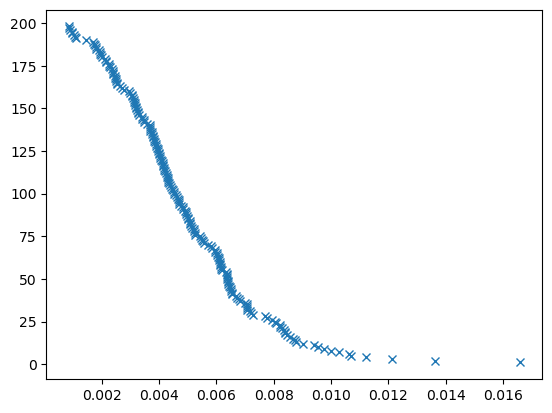

In [35]:
# Cumulative distribution for our PageRank function

cdf_x = []  # list of x-axis
cdf_y = []  # list of y-axis

mypr_values_copy = list(mypr_values).copy() 
N = len(mypr_values_copy)
N_temp = N 

while mypr_values_copy:
    current_min = min(mypr_values_copy) 
    current_num = mypr_values_copy.count(current_min) 
    cdf_x.append(current_min) 
    cdf_y.append(N_temp)
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        mypr_values_copy.remove(current_min) 
        
plt.plot(cdf_x,cdf_y,"x")

From the last two cells we notice that with a different alpha (equal to 0.5) the number of iterations required for the convergence is lower, but the distribution is not heavily affected.

# Conclusion

From the last steps of our analysis we can conclude that the most central node in our graph is 136.
We have calculated it through both decay centrality and PageRank.

# 5) WEEK 6

The goal of this week is the implementation of the community detection techniques we know.

We are going to work on the largest connected component of our graph and, using networkx functions, we are going to implement bridge removal, modularity optimization, and label propagation.

Then, we will compare the results of each technique in terms of: 
a) number of detected clusters 
b) cluster size distribution
c) computational time
d) NMI
e) modularity

Moreover, we will give an interpretation to the differences and similarities between the three resulting partitions, and discuss which one we think is best and why.

Finally, we are going to provide a visualization for the three partitions. 

In [36]:
connectivity = nx.is_connected(G)
print("The subgraph is connected:",connectivity)

The subgraph is connected: True


This means that we will work directly on our graph G, as it is itself the largest connected component.

## 5.1) Community detection

### 5.1.1) Bridge removal

We implement the bridge removal method using the Girvan-Newman algorithm. Since this returns a hierarchy of partitions, we select the one maximizing the modularity.

#### WARNING! This cell may took a couple of minutes to run.

In [72]:
start = time.time()
# Girvan-Newman algorithm
partitions = nx.community.girvan_newman(G)   

# Computing the modularity of each partition
max_mod = 0
for partition in partitions:
    # this loop takes around a minute, two at most!
    modularity = nx.community.quality.modularity(G, partition)
    if modularity > max_mod:
        max_mod = modularity
        partition_br = partition
end = time.time()
time_br = end-start
print(max_mod)
partition_br = [frozenset(x) for x in partition_br]
print(partition_br)

0.4050988992046884
[frozenset({1, 131, 132, 135, 8, 139, 22, 24, 154, 32, 33, 35, 166, 38, 168, 40, 171, 43, 44, 46, 50, 179, 182, 58, 187, 60, 62, 63, 64, 65, 66, 68, 78, 81, 91, 95, 98, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 122, 123}), frozenset({2}), frozenset({128, 3, 4, 5, 138, 140, 13, 144, 18, 147, 149, 153, 26, 27, 156, 28, 29, 155, 163, 167, 169, 41, 172, 173, 45, 176, 51, 184, 189, 191, 198, 73, 75, 76, 77, 79, 85, 86, 88, 90, 96, 97, 102, 124, 126}), frozenset({152, 115, 157, 6}), frozenset({129, 130, 7, 136, 10, 12, 141, 14, 142, 143, 146, 19, 150, 151, 158, 31, 161, 36, 164, 170, 174, 175, 49, 177, 178, 53, 54, 55, 56, 57, 183, 186, 61, 190, 192, 193, 194, 67, 195, 69, 70, 71, 196, 197, 74, 83, 84, 87, 89, 93, 94, 103, 111, 112, 114, 118, 121, 125, 127}), frozenset({9}), frozenset({11}), frozenset({15}), frozenset({16}), frozenset({17}), frozenset({20}), frozenset({21}), frozenset({23}), frozenset({25, 148, 92}), frozenset({30}), frozenset({34}), frozenset({180,

### 5.1.2) Modularity optimization

Here, we directly maximize the modularity, and to do so we employ Newman's greedy algorithm.
In the specific case, each frozenset in the list is a different community.

In [38]:
start = time.time()
partition_mo = nx.community.greedy_modularity_communities(G)
end = time.time()
time_mo = end-start
print(partition_mo)

[frozenset({1, 8, 9, 15, 16, 17, 22, 23, 24, 32, 33, 35, 38, 40, 42, 43, 44, 46, 48, 50, 58, 60, 62, 63, 64, 65, 66, 68, 74, 78, 80, 81, 91, 95, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 116, 119, 120, 122, 123, 131, 132, 134, 135, 139, 154, 159, 162, 166, 168, 170, 171, 179, 182, 187, 188}), frozenset({2, 7, 10, 11, 12, 14, 19, 20, 30, 31, 34, 36, 49, 52, 53, 54, 55, 56, 57, 61, 67, 69, 70, 71, 72, 83, 84, 87, 89, 93, 94, 111, 112, 113, 114, 117, 118, 121, 125, 127, 129, 130, 137, 141, 142, 146, 150, 151, 158, 161, 164, 165, 174, 175, 177, 178, 183, 185, 186, 190, 192, 193, 194, 195, 196, 197}), frozenset({128, 3, 4, 5, 6, 133, 136, 138, 140, 13, 144, 145, 18, 147, 148, 21, 149, 152, 25, 153, 26, 27, 157, 155, 156, 160, 29, 28, 163, 37, 39, 167, 41, 169, 172, 45, 173, 47, 176, 51, 180, 181, 184, 189, 191, 198, 73, 75, 76, 77, 79, 85, 86, 88, 90, 92, 96, 97, 102, 115, 124, 126}), frozenset({82, 59, 143})]


### 5.1.3) Label propagation

In [39]:
start = time.time()
communities = nx.community.asyn_lpa_communities(G, seed = 42) # we will explain this seed later
partition_lp = [frozenset(c) for c in communities]
end = time.time()
time_lp = end-start
print(partition_lp)

[frozenset({1, 131, 134, 135, 8, 9, 139, 15, 16, 17, 23, 24, 154, 159, 32, 33, 162, 35, 38, 166, 40, 168, 42, 44, 46, 48, 50, 179, 58, 187, 188, 62, 63, 64, 65, 66, 68, 78, 80, 91, 98, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 116, 119, 120, 122, 123}), frozenset({2, 7, 10, 11, 12, 14, 18, 19, 20, 22, 30, 31, 34, 36, 43, 49, 52, 53, 54, 55, 56, 57, 59, 60, 61, 67, 69, 70, 71, 72, 74, 81, 82, 83, 84, 87, 89, 93, 94, 95, 103, 111, 112, 113, 114, 117, 118, 121, 125, 127, 129, 130, 132, 136, 137, 141, 142, 143, 146, 150, 151, 158, 161, 164, 165, 170, 171, 174, 175, 177, 178, 182, 183, 185, 186, 190, 192, 193, 194, 195, 196, 197}), frozenset({128, 3, 4, 5, 133, 138, 140, 13, 144, 145, 147, 148, 21, 149, 25, 26, 27, 28, 29, 153, 155, 156, 160, 163, 37, 39, 167, 41, 169, 172, 45, 173, 47, 176, 51, 180, 181, 184, 189, 191, 198, 73, 75, 76, 77, 79, 85, 86, 88, 90, 92, 96, 97, 102, 115, 124, 126}), frozenset({152, 157, 6})]


## 5.2) Results comparison

### 5.2.1) Number of detected clusters

In [40]:
print(len(partition_br))
print(len(partition_mo))
print(len(partition_lp))

39
4
4


### 5.2.2) Cluster size distribution

With bridge removal we have 39 clusters.
Their sizes are: [49, 1, 45, 4, 59, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
With modularity optimization we have 4 clusters.
Their sizes are: [67, 66, 62, 3]
With label propagation we have 4 clusters.
Their sizes are: [56, 82, 57, 3]


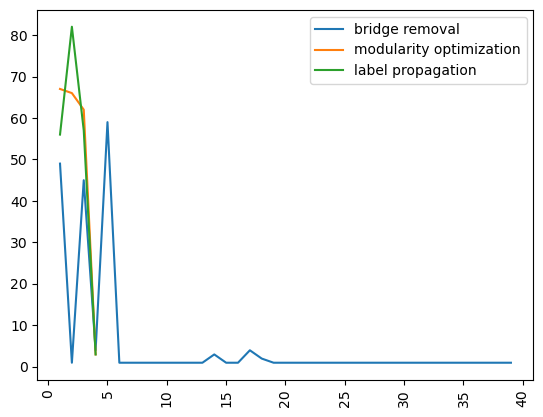

In [41]:
for y in [partition_br,partition_mo,partition_lp]:
    if y == partition_br:
        name = "bridge removal"
    elif y == partition_mo:
        name = "modularity optimization"
    else:
        name = "label propagation"
    n = 1
    cluster_num = []
    for x in y:
        cluster_num.append(n)
        n +=1
    cluster_size = []
    for x in y:
        cluster_size.append(len(x))

    print(f"With {name} we have {cluster_num[-1]} clusters.")
    print(f"Their sizes are: {cluster_size}")
    plt.xticks(rotation = 90)
    plt.plot(cluster_num, cluster_size,label=f'{name}')
    plt.legend()

### 5.2.3) Computational time

In [42]:
print(f"Modularity optimization takes {time_mo} seconds.")

print(f"Label propagation takes {time_lp} seconds.")

print(f"Bridge removal takes {time_br} seconds.")

Modularity optimization takes 0.16721487045288086 seconds.
Label propagation takes 0.0047779083251953125 seconds.
Bridge removal takes 119.12185502052307 seconds.


### 5.2.4) Normalized mutual information

In [43]:
# NMI

from sklearn.metrics.cluster import normalized_mutual_info_score

partition_map1 = []
for i in range(198):
    partition_map1.append(0)

for idx, cluster_nodes in enumerate(partition_br):
    for node in cluster_nodes:
        partition_map1[node-1] = idx      
        
partition_map2 = []
for i in range(198):
    partition_map2.append(0)

for idx, cluster_nodes in enumerate(partition_mo):
    for node in cluster_nodes:
        partition_map2[node-1] = idx

partition_map3 = []
for i in range(198):
    partition_map3.append(0)

for idx, cluster_nodes in enumerate(partition_lp):
    for node in cluster_nodes:
        partition_map3[node-1] = idx
        
NMI_br_mo = normalized_mutual_info_score(partition_map1,partition_map2)
NMI_br_lp = normalized_mutual_info_score(partition_map1,partition_map3)
NMI_mod_lp = normalized_mutual_info_score(partition_map2,partition_map3)

print("NMI between partition_br and partition_mod is", NMI_br_mo)
print("NMI between partition_br and partition_lp is", NMI_br_lp)
print("NMI between partition_mod and partition_lp is", NMI_mod_lp)

NMI between partition_br and partition_mod is 0.6312091725132633
NMI between partition_br and partition_lp is 0.6034131319612517
NMI between partition_mod and partition_lp is 0.7710794784117869


### 5.2.5) Modularity

In [44]:
# MODULARITIES

import networkx.algorithms.community as nx_comm

mod_br = nx_comm.modularity(G, partition_br)
mod_opt = nx_comm.modularity(G, partition_mo)
mod_lp = nx_comm.modularity(G, partition_lp)

print(mod_br)
print(mod_opt)
print(mod_lp)

0.4050988992046884
0.43890781537538287
0.4291379976282705


### 5.2.6) Comparison

In [45]:
data = {'Bridge removal':  [len(partition_br), time_br, mod_br],
        'Modularity optimization': [len(partition_mo), time_mo, mod_opt],
        'Label propagation': [len(partition_lp), time_lp, mod_lp]
        }

df = pd.DataFrame(data, index = ['Cluster size', 'Computational time', 'Modularity'])

def make_pretty(styler):
    styler.set_caption("RESULTS COMPARISON (cluster size distribution has already been visualized)")
    return styler

df.style.pipe(make_pretty)

,Bridge removal,Modularity optimization,Label propagation
Cluster size,39.000000,4.000000,4.000000
Computational time,119.121855,0.167215,0.004778
Modularity,0.405099,0.438908,0.429138


In [46]:
data = {'Bridge removal':  [1, NMI_br_mo, NMI_br_lp],
        'Modularity optimization': [NMI_br_mo, 1, NMI_mod_lp],
        'Label propagation': [NMI_br_lp, NMI_mod_lp, 1]
        }

df = pd.DataFrame(data, index = ['Bridge removal', 'Modularity optimization', 'Label propagation'])

def make_pretty(styler):
    styler.set_caption("NMI")
    return styler

df.style.pipe(make_pretty)

,Bridge removal,Modularity optimization,Label propagation
Bridge removal,1.000000,0.631209,0.603413
Modularity optimization,0.631209,1.000000,0.771079
Label propagation,0.603413,0.771079,1.000000


## 5.2 Interpretation

### 5.2.1) Bridge removal: limitations of the Girvan-Newman algorithm

There are two main problems we know with the GN algorithm used for bridge removal based community detection: it is very slow! This is because the betweenness recalculation at each step is not a simple task. 

This is confirmed by our comparison of computational times: BR takes 2 minutes, while the other community detection methods take less than a second.

Moreover, we know that this method delivers a full hierarchy of N partitions, without providing a criterion to choose meaningful ones. We actually get 39 partitions, compared to the four obtained with MO and LP, which, visualized later, appear to be a sensible number.

### 5.2.2) Modularity optimization: limitations of Newman's greedy algorithm

We know that the aforementioned technique Tends to generate unbalanced partitions with some clusters much larger than others, which also slow it down.

In fact, this is the second slowest method, and we get partitions whose sizes are [67, 66, 62, 3]. Nevertheless, this is the algorithm that has partitions whose sizes are the most balanced.

### 5.2.3) Label propagation: its features and how it compares to the others

Label propagation has an element of randomness in its algorithm: sweeping over nodes in random order, each node takes the label shared by the majority of its neighbors. If there is no unique majority, one of the majority labels is picked at random.

This is why we choosed a very important number to be fixed as a seed.  This solves the fact that the final partition depends on the order in which nodes are visited in each sweep. With a fixed seed, there is no instability anymore.

For this reason, looking at its advantages:
- lowest computational time;
- balanced partitions (but never better than those obtained with MO in our case, after a lot of testing);
- simplicity.

This may be the best community detection method we have. We have further confirmation of our opinion in the visualizations below.

## 5.3 Visualization

We expect to get more understandable visualizations for the MO and LP partitions, and this is actually what happens.

In [47]:
# Partition maps
partition_map_br = {}
for idx, cluster_nodes in enumerate(partition_br):
    for node in cluster_nodes:
        partition_map_br[node] = idx
        
partition_map_mo = {}
for idx, cluster_nodes in enumerate(partition_mo):
    for node in cluster_nodes:
        partition_map_mo[node] = idx
        
partition_map_lp = {}
for idx, cluster_nodes in enumerate(partition_lp):
    for node in cluster_nodes:
        partition_map_lp[node] = idx

### 5.3.1) BR

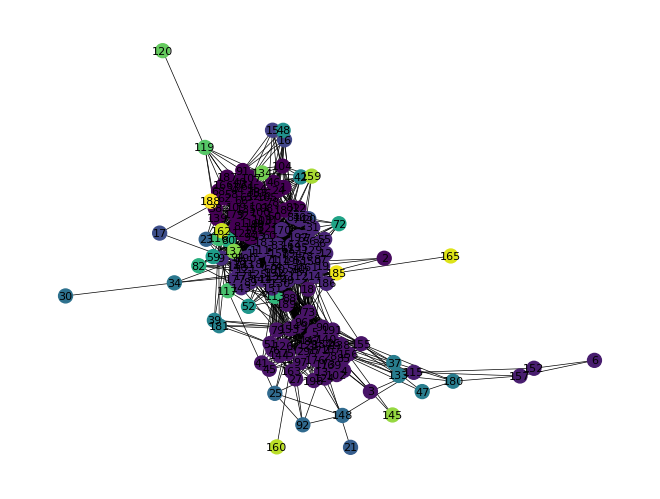

In [48]:
# Assign colors to each group
node_colors = [partition_map_br[n] for n in G.nodes]

# Draw the graph and the communities
nx.draw(G, 
        node_size = 100, 
        node_color = node_colors,
        with_labels = True, 
        width = 0.5, 
        font_size = 8,
        font_color = 'black')

### 5.3.2) MO

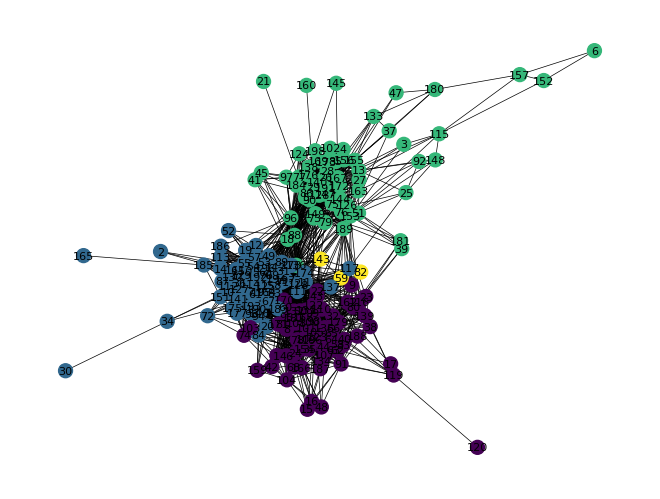

In [49]:
# Assign colors to each group
node_colors = [partition_map_mo[n] for n in G.nodes]

# Draw the graph and the communities
nx.draw(G, 
        node_size = 100, 
        node_color = node_colors,
        with_labels = True, 
        width = 0.5, 
        font_size = 8,
        font_color = 'black')

### 5.3.3) LP

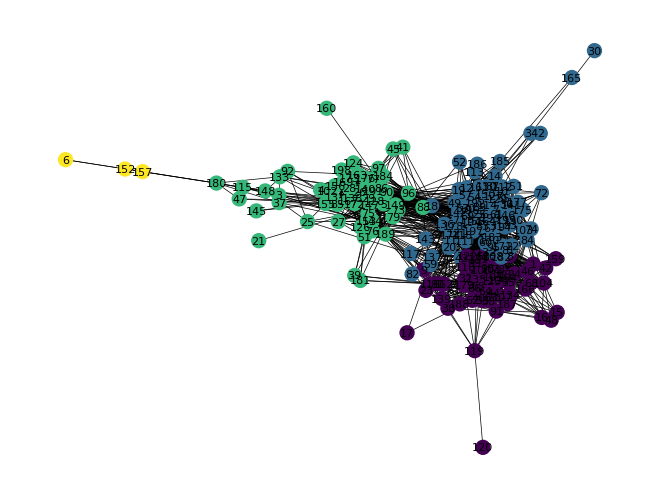

In [50]:
# Assign colors to each group
node_colors = [partition_map_lp[n] for n in G.nodes]

# Draw the graph and the communities
nx.draw(G, 
        node_size = 100, 
        node_color = node_colors,
        with_labels = True, 
        width = 0.5, 
        font_size = 8,
        font_color = 'black')

# 6. WEEK 7

In Week 7 we are going to:
1) Implement a function to compute the following topological similarity indices: CN, JI, PA, AA, RA.

2) Compute 6 link likelihood scores: one for each of the five indices, and one obtained as the arithmetic mean of
the indices.

3) For each of the 6 scores, identify as missing links the node pairs yielding the largest 10 values. 

4) Build a function to compute the Katz Index, use it as an additional link likelihood score, and
compare the results with those coming from the local indices.

## 6.1) IMPLEMENTING THE 'INDICES MEASURE' FUNCTION

In this week we'll focus on estimating the likelihood of the existence of a link between two unconnected nodes in a network.
We are going to follow a similarity-based approach which is based on the calculation of one or more
similarity indices for each unconnected pair of nodes.
The similarity indices we are interested in are called 'Topological Indices' sinced they are based on the structure of the network.
The main topological indices can be distinguished in:
Local:
• Common neighbors (CN).
• Jaccard index (JI).
• Preferential attachement index (PA).
• Adamic-Adar index (AA).
• Resource allocation index (RA).

Global:
• Shortest-path length index (SL), Katz index (KI).
• Hitting time index (HT), Commute time index (CT).

In the following cell we implement a function to compute the Local Topological Indices. 

Our function takes as input a graph G and a list of indices in the form of strings. 
The output will be a DataFrame with node pairs as indices and the five topological measures as columns.
Our function converts and stores our dataframe as a csv file. 
We calculate the indices through the built in functions of networkx.

In [51]:
def indices_measures(Gr, sim_indices = ['CN', 'JA', 'PA', 'AA', 'RA']):
    
    df_INDICES = pd.DataFrame()
    
    #We compute JI on default in order to store the couple of nodes which are unconnected
    #as indices of our dataframe
    
    list_non_edges = []      
    predsJI = nx.jaccard_coefficient(Gr)
    for u, v, p in predsJI:
        list_non_edges.append((u,v))
    df_INDICES['Unconnected pairs'] = list_non_edges
    
    for index in sim_indices:   # we iterate through the given list of indices
        
        if 'CN' in index:
            predsCN = nx.common_neighbor_centrality(Gr)
            CN = []
            for u, v, p in predsCN:
                CN.append(p)
            df_INDICES['CN']= CN
                      
        if 'JA' in index:
            predsJI = nx.jaccard_coefficient(Gr)
            JI = []
            for u, v, p in predsJI:
                JI.append(p)
            df_INDICES['JI']= JI
                     
        if 'PA' in index:
            predsPA = nx.preferential_attachment(Gr)
            PA = []
            for u, v, p in predsPA:
                #print(f"({u}, {v}) -> {p:.5f}")
                PA.append(p)
            df_INDICES['PA']= PA
            
        if 'AA' in index:
            predsAA = nx.adamic_adar_index(Gr)
            AA = []
            for u, v, p in predsAA:
                #print(f"({u}, {v}) -> {p:.5f}")
                AA.append(p)
            df_INDICES['AA']= AA
        
        if 'RA' in index:
            predsRA = nx.resource_allocation_index(Gr)
            RA = []
            for u, v, p in predsRA:
                RA.append(p)
            df_INDICES['RA']= RA
            
    df_INDICES.set_index('Unconnected pairs', inplace=True)   
    
    sim_df = df_INDICES.to_csv('sim_df.csv') #storing our dataframe in a csv file
        
    return df_INDICES


indices_measures(G)

,CN,JI,PA,AA,RA
Unconnected pairs,,,,,
"(1, 2)",13.20,0.000000,69,0.000000,0.000000
"(1, 3)",13.20,0.000000,92,0.000000,0.000000
"(1, 4)",13.20,0.000000,368,0.000000,0.000000
"(1, 5)",13.20,0.000000,1058,0.000000,0.000000
"(1, 6)",7.92,0.000000,46,0.000000,0.000000
...,...,...,...,...,...
"(193, 198)",13.20,0.000000,392,0.000000,0.000000
"(194, 198)",20.60,0.014493,784,0.253085,0.019231
"(195, 198)",13.20,0.000000,644,0.000000,0.000000


## 6.2) Link Likelihood Scores

Once similarity indices are computed, we have to synthesize them properly to obtain the link likelihood scores.
If one index is adequately representative, we can consider the value taken by each node pair as the corresponding final score.
In this task, we're asked to take into account the 5 topological indices as scores and to compute a new score 'Mean Score' obtained as the arithmetic mean of the mentioned indices.

### Rescaling function
First of all we have to define a function to rescale the values of the first 5 scores.In fact, to compute the 'Mean Score' is necessary to rescale the scores we have previously obtained. If we don't rescale then our mean we'll represent an insignificant value

In [52]:
def min_max_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

Now we can load our dataframe of similarity indices and scale them.

In [53]:
sim_df = pd.read_csv('sim_df.csv', index_col = 0) #loading the csv file
scaled_sim_df = sim_df.transform(min_max_scale, axis = 0) #applying the rescaling function to our indices

We compute the mean score through the pandas built-in function 'aggregate' which perform the numpy mean over the specified axis.
Then we label the columns of our dataframe with the name of the computed scores.

In [54]:
mean_score = scaled_sim_df.aggregate(np.mean, axis = 1) #
score_df = pd.concat([sim_df, mean_score], axis = 1)
score_df.columns = ('CN_score', 'JI_score', 'PA_score', 'AA_score', 'RA_score', 'Mean_score')

## 6.3) Predicting the missing links
Once scores are computed, they are ranked in decreasing order,and the top ones are identified as the predicted links.
In this case, we're asked to choose as missing links the top 10 pair of nodes for each score.
Pandas ranks is a simple but helpful function that ranks data points in relation with each other.
We recall that by default, equal values are assigned a rank that is the average of the ranks of those values.
We pass as parameter first: thus ranks are assigned in order they appear in the array.Setting ascending = False means that our values will be ranked in discending order.

In [55]:
ranked_df = score_df.rank(axis = 0, method = 'first', ascending = False)
# Predicted links using the CN-based link likelihood score
CN_pred = ranked_df[ranked_df['CN_score'] <= 10].index.to_list() # We select the first 10 pair of nodes in our ranked dataframe
print(f'The missig links accorsingly to CN score are:\n {CN_pred}\n')

JI_pred = ranked_df[ranked_df['JI_score'] <= 10].index.to_list()
print(f'The missig links accorsingly to JI score are:\n {JI_pred}\n')

PA_pred = ranked_df[ranked_df['PA_score'] <= 10].index.to_list()
print(f'The missig links accorsingly to PA score are:\n {PA_pred}\n')

AA_pred = ranked_df[ranked_df['AA_score'] <= 10].index.to_list()
print(f'The missig links accorsingly to AA score are:\n {AA_pred}\n')

RA_pred = ranked_df[ranked_df['RA_score'] <= 10].index.to_list()
print(f'The missig links accorsingly to RA score are:\n {RA_pred}\n')

Mean_pred = ranked_df[ranked_df['Mean_score'] <= 10].index.to_list()
print(f'The missig links accorsingly to Mean score are:\n {Mean_pred}\n')

The missig links accorsingly to CN score are:
 ['(7, 54)', '(53, 136)', '(54, 114)', '(54, 136)', '(60, 170)', '(60, 178)', '(69, 83)', '(70, 196)', '(136, 195)', '(168, 174)']

The missig links accorsingly to JI score are:
 ['(7, 54)', '(27, 75)', '(28, 169)', '(77, 176)', '(85, 173)', '(85, 176)', '(138, 140)', '(138, 176)', '(169, 191)', '(176, 191)']

The missig links accorsingly to PA score are:
 ['(5, 60)', '(35, 136)', '(54, 136)', '(60, 149)', '(60, 167)', '(60, 170)', '(60, 96)', '(135, 136)', '(136, 179)', '(136, 195)']

The missig links accorsingly to AA score are:
 ['(7, 54)', '(54, 114)', '(54, 136)', '(60, 170)', '(60, 178)', '(69, 83)', '(70, 196)', '(136, 195)', '(168, 174)', '(168, 183)']

The missig links accorsingly to RA score are:
 ['(7, 54)', '(54, 114)', '(54, 136)', '(60, 170)', '(62, 136)', '(70, 196)', '(90, 155)', '(136, 153)', '(136, 195)', '(168, 183)']

The missig links accorsingly to Mean score are:
 ['(7, 54)', '(53, 136)', '(54, 114)', '(54, 136)', '(60

## 6.4) Katz index

Katz centrality takes into consideration both the number of direct neighbours
and the further connections of a node in the network. 
That is, a node is important in Katz centrality if it has universal connections to other nodes in the
network. 
Katz centrality takes into account all paths of arbitrary length from a
node i to other nodes in the network.
Connections made with distant neighbors are, however, penalized by an attenuation factor b. 
which should be strictly less than the inverse largest eigenvalue of the adjacency matrix in order for the Katz centrality to be computed correctly. 
In our function we create the adjacency matrix and through a loop we compute the multiple of the sudden matrix. To find the walk of lenght l between node i and j we have to select the entry in row i and column j of the A^l matrix. 
The Katz index takes into account every lenght from 1 to infinity. 
To avoid the infinite loop we set max_iter as an argument of our function. If not provided, we default max_iter to 5. 
The output of the function is a dataframe.

#### WARNING! The function nx.to_scipy_sparse_array may be changed to nx.adjacency_matrix depending on the version of the scipy packages.

In [56]:
def Katz_Index(G, max_iter = 5, beta = 0.25):
    
    nodes = sorted(G.nodes())
    adj_matrix = nx.to_scipy_sparse_array(G, nodes) #creating the adjency matrix
    list_non_edges = []      
    predsJI = nx.jaccard_coefficient(G)
    for u, v, p in predsJI:
        list_non_edges.append((u,v))
        
    katz_dict = {} #initializing our dict that will store the katz index
    list_of_matrices = [adj_matrix]
    
    
    for j in range(1,max_iter):
        matrix_temp = list_of_matrices[j-1] * adj_matrix #Creating a multiple of our matrix with a loop (A^2, A^3, until we reach max_iter)
        list_of_matrices.append(matrix_temp)
        
    for edge in list_non_edges:
        katz_index = 0
        for i in range(1, max_iter + 1):
            paths = list_of_matrices[i-1][edge[0] - 1, edge[1] - 1]
            katz_index += (beta ** i)*paths #formula for the katz index
        katz_dict[edge] = katz_index
        
    katz_df = pd.DataFrame(katz_dict.items(),columns = ['Unconnected pairs','Katz_Index'])
    katz_df.set_index('Unconnected pairs', inplace=True)
        
    return katz_df

katz_index = Katz_Index(G,4)

scores_dataframe = pd.concat([score_df, katz_index['Katz_Index']], axis = 1)
print(scores_dataframe.head())

                   CN_score  JI_score  PA_score  AA_score  RA_score  \
Unconnected pairs                                                     
(1, 2)                13.20       0.0      69.0       0.0       0.0   
(1, 3)                13.20       0.0      92.0       0.0       0.0   
(1, 4)                13.20       0.0     368.0       0.0       0.0   
(1, 5)                13.20       0.0    1058.0       0.0       0.0   
(1, 6)                 7.92       0.0      46.0       0.0       0.0   

                   Mean_score  Katz_Index  
Unconnected pairs                          
(1, 2)               0.031320         NaN  
(1, 3)               0.032207         NaN  
(1, 4)               0.042857         NaN  
(1, 5)               0.069483         NaN  
(1, 6)               0.007476         NaN  


# 7) WEEK 9

## 7.1)  Introduction to the task

We picked the Erdős–Rényi random graph model, and from that we found the parameter to obtain the correct average degree and compared it with diameter, most central node and number of edges.

## 7.2) Choice of the random graph model 
First, let us recall you the structure of our graph: Jazz Collaboration. It represents the network of collaborations among jazz musicians of bands that performed between 1912 and 1940. In particular, nodes are jazz musicians and edges are collaborations among the latter.

Secondly, let us briefly recall the definition of Erdős–Rényi random graph model, even known as binomial model of Erdős–Rényi. In the variant we have analyzed, meaning the G(n,p) model, the random graph is constructed by connecting nodes randomly. In other words, each edge is included in the graph with a probability p that is independent from any other edge.

According to the aforementioned features of our graph, it seems to us that modeling it through an Erdős–Rényi random graph model is a reasonable idea. In fact, we are assuming a collaboration (link) between two jazz musicians (nodes) to be independent from any other collaboration between different musicians. The only factor that influences such collaboration to exist is supposed to be a certain probability p. Moreover, to convice you on the reasons of our assumption, we are considering even the period in which jazz musicians performed: 1912/1940. It was an age where information was spread at a low rate (in contrast to what happens today thanks to social media), hence musicians probably were not aware of other musicians' collaborations, so independency among the links should be a reasonable assumption. 

## 7.3) Creating the random graph

For the sake of completeness, we will create two random graphs: the first using the standard  Erdős–Rényi model; the second one using a "customized" version of Erdős–Rényi model. Then, we will compute some metrics on both the two random graphs, which will be later compared to the same metrics computed on the original graph.

### 7.3.1) Standard Erdős–Rényi model 

To compute any Erdős–Rényi model, we need the number of nodes of the graph, and a certain probability p, standing as the probability for an edge to be in the random graph model. The given parameter p is crucial, in fact the higher such probability, the higher the number of edges. Why? It happens beacuse each edge is assigned whenever r (a certain number uniformely extracted from 0 and 1) is <= p. It follows that if p is high, whe have a higher chance for r to be <= such probability.

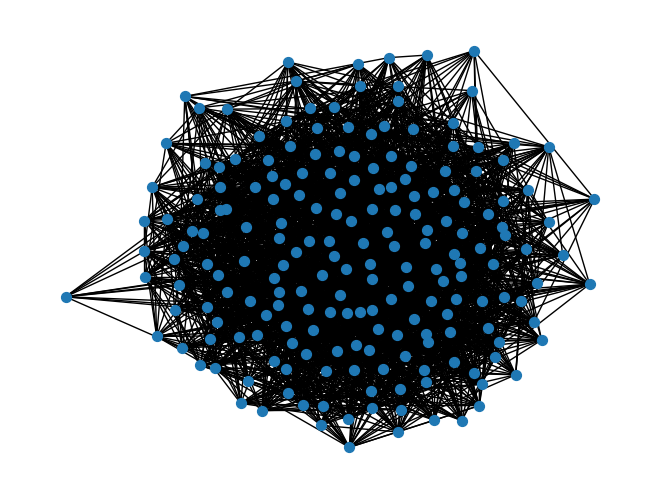

In [57]:
# Number of nodes in the graph
num_nodes = G.number_of_nodes()

# Probability p
p = 0.1383 # consider it as a test probability, you may change it if needed

#---------------------------------------------------------------------------#

# Creating the random graph using Erdős–Rényi model.
# For the sake of simplicity, we will use networkx function

G_er_standard = nx.erdos_renyi_graph(num_nodes, p)

# Drawing the random graph

nx.draw(G_er_standard, node_size=50)
plt.show()

### 7.3.2) Customized Erdős–Rényi model

Since we will make some changes with respect to the original algorithm, we are going to implement a function that creates such random model from scratch. Hence, in this section no built-in functions will be used.

In [58]:
def custom_erdosrenyi(nodes: int, probability: 1, distance: int):
    
    #initializing the graph
    G_er_custom = nx.Graph()
    #creating the nodes
    G_er_custom.add_nodes_from(range(nodes))
    
    for n1 in range(nodes): #picking one node
        for n2 in range(n1, nodes): #picking another node with higher index
            
            if distance <= 30:
                if (n1 == n2) or (n2 >= n1+distance**2):
                    continue
                if random.uniform(0,1) <= probability: #if verified, then an edge is added
                    G_er_custom.add_edge(n1, n2, length=1)
            else:
                if (n1 == n2) or (n2 >= n1+distance):
                    continue
                if random.uniform(0,1) <= probability: #if verified, then an edge is added
                    G_er_custom.add_edge(n1, n2, length=1)
                
    return G_er_custom

The function above is a customized version of the Erdős–Rényi model. In particular, it differs in one condition that actually turns out to play a crucial role. In a standard Erdős–Rényi model, the only check that is done concerns the value of r (a certain number uniformely extracted from o and 1). if this value is is <= probability p, then the edge is added. In our customized version, we're introducing another parameter. In particular, we let the user set a "distance" parameter, thus to allude to the distance between two nodes (hence, between two musicians according to our graph). Then, if the user selects a relatively small small value for the distance, the algorithm will exlude the creation of an edge for two musicians that are more distant than the distance selected as input, taken to the power of 2. Instead, if the distance passed as input is high, then we apply a more stringent reduction in the tolerance by excluding the nodes that are more distant than the distance passed through the parameter. Note that this last condition is much more stringent than the first one, that considers "distance^2" as possible range of nodes in which creating connections. Next, in a following section, the reasoning concernig the two excluding conditions will be clear.

Anyway, our if statements have the folloing consequences:

- Self edges are not allowed (ensured by the first condition on the two "if" statements)

- Nodes too distant are less likely to get connected

All things considered, we think that such algorithm may represent reality in quite a realistic way. To figure out better, consider the range of our data: jazz musicians performing between 1912/1940. As mentioned upon, it was very unlikely in those years for two musicians, living far apart, to take part in a collaboration for two main reasons:

1) Lack of instant communication, meaning that it was very unlikely for a jazz performer in America to know about another one living in Europe. Social media did not exist, thus interconnection among people was not guaranteed

2) Geographical distance, meaning that it would have costed too much for two musicians living in opposite regions of the world to meet each other and perform.

So, based on these two reasons, we decided to introduce two different constraints. The first one, less stringent, for nodes relatively close to each other. The second one, more stringent, for nodes that tend to be far apart.

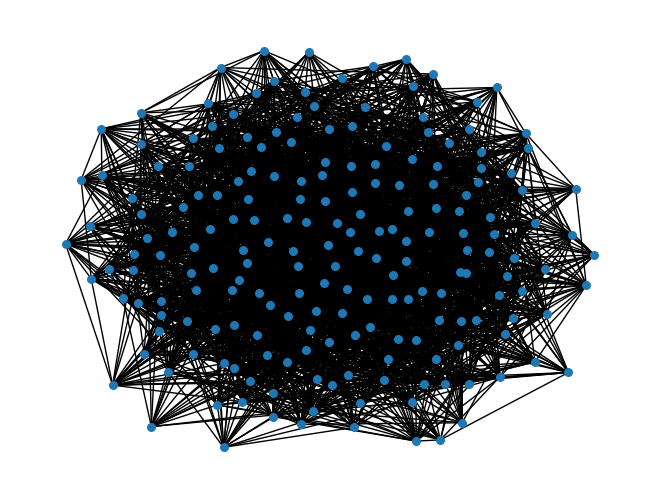

In [59]:
#drawing the customized Erdős–Rényi model
myG_er_custom = custom_erdosrenyi(num_nodes,p,distance=19)
nx.draw(myG_er_custom, node_size=30, with_labels=False)
plt.show()

## 7.4) Tuning parameter "p" to obtain correct avg degree

### 7.4.1) Average degree and num. of edges of real graph

In [60]:
#number of nodes
number_of_nodes = G.number_of_nodes()
print(f"Number of nodes: {number_of_nodes}")

#number of edges
number_of_edges = G.number_of_edges()

#average degree
'''
Recall that in an undirected graph <k> = 2L/N
'''
average_degree = 2*(number_of_edges)/number_of_nodes
print(f"Average degree: {average_degree}")

Number of nodes: 198
Average degree: 27.696969696969695


### 7.4.2) Average degree and num. of edges of the random ER (standard) model 

In [61]:
#number of nodes
nodes_er_standard = G_er_standard.number_of_nodes()
print(f"Number of nodes: {nodes_er_standard}")

#number of edges
edges_er_standard = G_er_standard.number_of_edges()

#expected average degree
avg_deg_standard = p*(nodes_er_standard - 1)
print(f"Expected average degree: {avg_deg_standard}")

Number of nodes: 198
Expected average degree: 27.2451


Strategy:
1) Compute the average degree of the real graph, thus to have a real measure of reference for the approximation of parameter "p" in the model

2) Start computing the average degree with a fixed initial parameter "p". In our case, we started with p = 0.05. Then, look at the result obtained at each attempt, and modify the parameter. 

We noted that the higher the value for "p", the more accurate the result. After some tests, it seems that the parameter p=0.1383 is the most accurate one.

### 7.4.3) Average degree and num. of edges of the random ER (customized) model


In [62]:
#number of nodes
nodes_er_custom = myG_er_custom.number_of_nodes()
print(f"Number of nodes: {nodes_er_custom}")

#number of edges
edges_er_custom = myG_er_custom.number_of_edges()

#average degree
'''
Recall that in an undirected graph <k> = 2L/N
'''
avg_degree_er_custom = 2*(edges_er_custom)/nodes_er_custom
print(f"Expected average degree: {avg_degree_er_custom}")

Number of nodes: 198
Expected average degree: 26.858585858585858


As you may notice, in our customized version of ER random model there are more parameters that influence the creation of the graph. In fact, in the standard ER random model it was simply a matter of modifying the single parameter p (probability). Instead, in our case, we need to take into account the way the two added constraints influence the final creation of the random graph. In fact, on one hand it is a random graph (hence randomness should be taken into account), but on the other one we aim at creating a graph that resembles the original one in the best way possible. To achieve such goal, we adopted the following strategy:

- We decided that the algorithm should have taken into account the distance of the nodes to each others, thus giving more chance to close nodes to be connected. 

-  We set the two conditions and started verifying the output with different constraints. In particular, we based our comparison based on the average degree, and set as initial constraints the simple parameter "distance" for the first condition, and the logarithm of "distance" for the second condition. Then we figured out that the first one did not valorize enough the closeness of nodes, while the second one was too stringent. After some attempts, we ended up with the parameter "**distance^2**" as a first condition, and the simple parameter "**distance**" as second condition. Finally, we noticed that the optimal probability **p** was 1. With such parameters and constraints, the average degree of ER (customized) random model seems to be extremely close the one of the original graph.

## 7.5) Comparing the diameter
Recall that the diameter of a graph is the length of the shortest path between the most distant nodes in the graph.

### 7.5.1) Diameter of original graph

In [63]:
original_diameter = nx.diameter(G)
print(original_diameter)

6


### 7.5.2) Diameter of ER (standard) model


In [64]:
#Checking if the random graph is connected.
er_standard_connectivity = nx.is_connected(G_er_standard)

#If the graph is connected, then the diameter may be computed. Otherwise an error will occur.
if er_standard_connectivity == True:
    er_standard_diameter = nx.diameter(G_er_standard)
    print(er_standard_diameter)
else:
    print("The random graph is disconnected, thus resulting in infinite path length.")

3


### 7.5.3) Diameter of ER (customized) model


In [65]:
#Checking if the random graph is connected.
er_custom_connectivity = nx.is_connected(myG_er_custom)

#If the graph is connected, then the diameter may be computed. Otherwise an error will occur.
if er_custom_connectivity == True:
    er_custom_diameter = nx.diameter(myG_er_custom)
    print(er_custom_diameter)
else:
    print("The random graph is disconnected, thus resulting in infinite path length.")

3


## 7.6) Comparing the most central node according to PageRank

### 7.6.1) Most central node in original graph

In [66]:
# PageRank scores computation
pr = nx.pagerank(G)   # returns a dictionary

# Separately save the values of the dictionary
pr_values = pr.values()

# Node with highest value of PageRank
value_max = max(pr_values)
index_max = list(pr_values).index(value_max) 
node_max = list_of_nodes[index_max] 
print(f"Most central node: {str(node_max)}")

Most central node: 136


### 7.6.2) Most central node in ER (standard) model

In [67]:
# PageRank scores computation
pr = nx.pagerank(G_er_standard)   # returns a dictionary

# Separately save the values of the dictionary
pr_values = pr.values()

# Node with highest value of PageRank
value_max = max(pr_values)
index_max = list(pr_values).index(value_max) 
node_max = list_of_nodes[index_max] 
print(f"Most central node: {str(node_max)}")

Most central node: 126


### 7.6.3) Most central node in ER (customized) model

In [68]:
# PageRank scores computation
pr = nx.pagerank(myG_er_custom)   # returns a dictionary

# Separately save the values of the dictionary
pr_values = pr.values()

# Node with highest value of PageRank
value_max = max(pr_values)
index_max = list(pr_values).index(value_max) 
node_max = list_of_nodes[index_max] 
print(f"Most central node: {str(node_max)}")

Most central node: 49


## 7.7) Comparing the number of edges

### 7.7.1) Number of edges original graph

In [69]:
#number of edges
number_of_edges = G.number_of_edges()
print(f"Number of edges: {number_of_edges}")

Number of edges: 2742


### 7.7.2) Number of edges ER (standard) model

In [70]:
#number of edges
number_of_edges_er_strd = G_er_standard.number_of_edges()
print(f"Number of edges: {number_of_edges_er_strd}")

Number of edges: 2699


### 7.7.3) Number of edges ER (customized) model

In [71]:
#number of edges
number_of_edges_er_cstm = myG_er_custom.number_of_edges()
print(f"Number of edges: {number_of_edges_er_cstm}")

Number of edges: 2659


## 7.8) Conclusions of the comparison

Here are the final outcomes of our comparisons:
The diameter of the original graph is 6, while that one of the two random graphs is 3. Moreover, we noted that the diameter of the random graphs is always 3, no matter how many times the graphs are created. The fact that the diameter of the two random graphs is smaller that the one of the original graph is not a coincidence. In fact, it may be proved that the diameter of a random graph with p vertices converges to 2, as p goes to infinity.
The most central nodes of the two random graphs differ from the most central of the original one. Anyway, this was to be expected as a consequence of randomization.
What seems to be always close to the original one, is the number of edges of the two random graphs. In our opinion, it is a sign of correctness of the random model adopted.